# Stock Price Prediction
#### Auto-ARIMA (ARIMAX) model with exogenous features for stock price forecasting

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing cleaned dataset

In [3]:
df = pd.read_csv('../Data/BAJFINANCE_Processed.csv', index_col='Date', parse_dates=True)

In [4]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Turnover rolling_mean_win(3),Turnover rolling_mean_win(7),High rolling_std_win(3),High rolling_std_win(7),Low rolling_std_win(3),Low rolling_std_win(7),Volume rolling_std_win(3),Volume rolling_std_win(7),Turnover rolling_std_win(3),Turnover rolling_std_win(7)
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-10,BAJAUTOFIN,EQ,34.75,35.40,35.50,34.25,34.25,34.40,34.98,1050,...,3.649867e+09,2.873359e+09,0.742181,0.634992,0.144338,0.429978,251.501491,462.924194,9.132604e+08,1.600642e+09
2002-01-11,BAJAUTOFIN,EQ,34.40,34.35,34.75,34.35,34.35,34.35,34.36,675,...,3.514575e+09,2.963055e+09,0.606218,0.490626,0.057735,0.174915,315.968880,446.232910,1.124337e+09,1.539829e+09
2002-01-14,BAJAUTOFIN,EQ,34.35,35.10,36.35,34.20,34.20,34.20,35.18,2888,...,5.384362e+09,3.711955e+09,0.800521,0.669221,0.076376,0.131385,1184.359039,881.773105,4.191597e+09,3.116781e+09
2002-01-15,BAJAUTOFIN,EQ,34.20,35.50,36.75,35.50,36.00,36.00,36.33,950,...,5.310528e+09,3.911098e+09,1.058301,0.845295,0.711220,0.512231,1206.153528,860.624081,4.238516e+09,3.036927e+09
2002-01-16,BAJAUTOFIN,EQ,36.00,38.75,38.90,36.00,38.90,38.65,37.46,19969,...,2.946869e+10,1.452504e+10,1.371435,1.477047,0.929157,0.772442,10466.126042,7104.000127,3.939608e+10,2.670670e+10


## Creating the Model (Auto-ARIMA)

### Splitting into training test set

In [6]:
## knowing the shape of the dataframe to split it 75/25
df.shape

(4618, 29)

In [7]:
training_data = df[0:3470]
test_data = df[3470:]

In [8]:
## initializing the dependent (target) and independent features
target = 'VWAP'
features = ['High rolling_mean_win(3)', 'High rolling_mean_win(7)',
       'Low rolling_mean_win(3)', 'Low rolling_mean_win(7)',
       'Volume rolling_mean_win(3)', 'Volume rolling_mean_win(7)',
       'Turnover rolling_mean_win(3)', 'Turnover rolling_mean_win(7)',
       'High rolling_std_win(3)', 'High rolling_std_win(7)',
       'Low rolling_std_win(3)', 'Low rolling_std_win(7)',
       'Volume rolling_std_win(3)', 'Volume rolling_std_win(7)',
       'Turnover rolling_std_win(3)', 'Turnover rolling_std_win(7)']

### Using pmdarima package

In [9]:
from pmdarima import auto_arima

In [10]:
model = auto_arima(y=training_data[target], X=training_data[features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29491.702, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30850.341, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30045.451, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29675.997, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=55666.788, Time=0.66 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29678.188, Time=1.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29500.640, Time=0.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=31172.479, Time=1.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=29480.646, Time=1.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=29480.982, Time=1.12 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=29483.357, Time=1.19 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=29526.877, Time=1.44 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=29479.055, Time=1.37 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=29488.872, Time=1.31 sec
 ARIMA(1,0,5)(0,0,0

In [11]:
test_data = test_data.copy()

In [12]:
## predicting
predictions = model.predict(n_periods=len(test_data), X=test_data[features])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
print(predictions)

3470    6198.055521
3471    6277.385514
3472    6280.915435
3473    6259.913555
3474    6196.638932
           ...     
4613    4108.114100
4614    4361.858804
4615    4363.832506
4616    4611.422115
4617    4656.130639
Length: 1148, dtype: float64


In [14]:
test_data['Forecast'] = predictions.values

In [15]:
test_data['Forecast']

Date
2016-01-08    6198.055521
2016-01-11    6277.385514
2016-01-12    6280.915435
2016-01-13    6259.913555
2016-01-14    6196.638932
                 ...     
2020-08-25    4108.114100
2020-08-26    4361.858804
2020-08-27    4363.832506
2020-08-28    4611.422115
2020-08-31    4656.130639
Name: Forecast, Length: 1148, dtype: float64

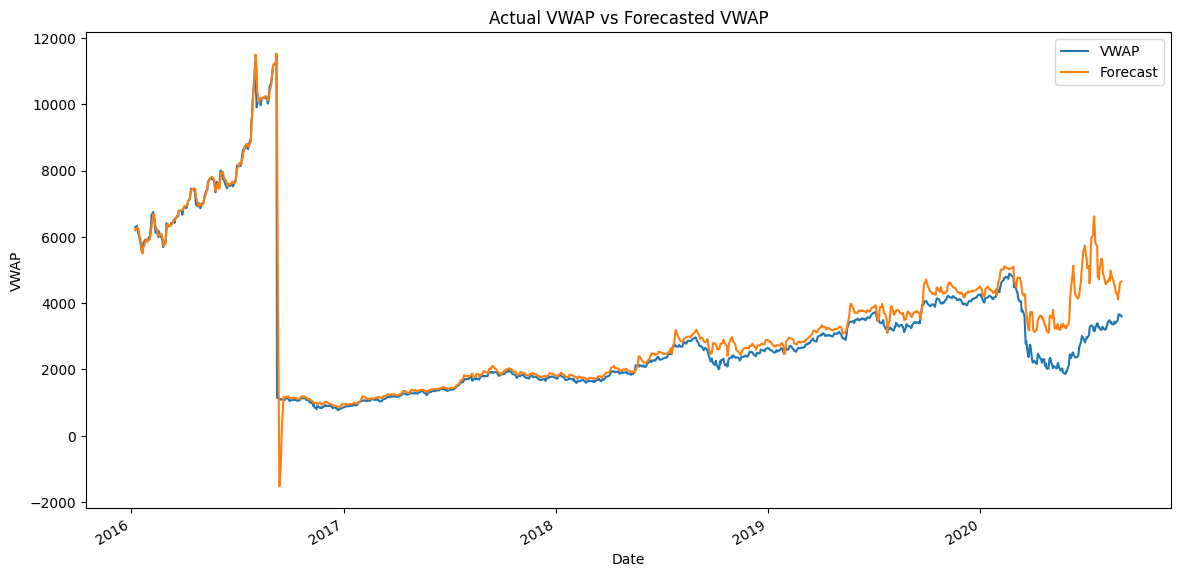

In [16]:
## plotting the actual VWAP and predicted VWAP
test_data[['VWAP', 'Forecast']].plot(figsize=(14,7))
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('Actual VWAP vs Forecasted VWAP')
plt.show()

**Hence, the model seems to do a good job in predicting stock prices.**

## Baseline Model (Naive) for Comparison again ARIMAX

In [17]:
# creating naive forecast
test_data = test_data.copy()
test_data['Naive'] = test_data[target].shift(1)

In [18]:
test_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_win(3),High rolling_std_win(7),Low rolling_std_win(3),Low rolling_std_win(7),Volume rolling_std_win(3),Volume rolling_std_win(7),Turnover rolling_std_win(3),Turnover rolling_std_win(7),Forecast,Naive
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,BAJFINANCE,EQ,6106.3,6136.0,6365.2,6092.6,6310.0,6314.5,6284.76,103507,...,104.185044,105.552927,70.965907,47.927479,34857.845850,26211.090045,2.217263e+13,1.665126e+13,6198.055521,NaN
2016-01-11,BAJFINANCE,EQ,6314.5,6311.9,6389.0,6221.0,6315.8,6306.2,6336.40,53240,...,108.733114,122.686113,97.283914,91.938315,25133.638462,26234.624780,1.568391e+13,1.664562e+13,6277.385514,6284.76


In [19]:
# dropping the first NA value
test_data = test_data.dropna()

In [20]:
test_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_win(3),High rolling_std_win(7),Low rolling_std_win(3),Low rolling_std_win(7),Volume rolling_std_win(3),Volume rolling_std_win(7),Turnover rolling_std_win(3),Turnover rolling_std_win(7),Forecast,Naive
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,BAJFINANCE,EQ,6314.5,6311.9,6389.0,6221.0,6315.8,6306.2,6336.40,53240,...,108.733114,122.686113,97.283914,91.938315,25133.638462,26234.624780,1.568391e+13,1.664562e+13,6277.385514,6284.76
2016-01-12,BAJFINANCE,EQ,6306.2,6310.0,6329.0,6152.0,6229.0,6208.8,6207.06,58452,...,30.212801,123.552158,64.259785,98.980452,27640.216045,23695.741331,1.739222e+13,1.506982e+13,6280.915435,6336.40


## Accuracy Metrics (ARIMAX vs Baseline Naive)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# ARIMAX mae & rmse
arima_mae = mean_absolute_error(test_data['VWAP'], test_data['Forecast'])
arima_rmse = np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast']))

# Naive mae & rmse
naive_mae = mean_absolute_error(test_data['VWAP'], test_data['Naive'])
naive_rmse = np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Naive']))

print("ARIMAX MAE:", arima_mae)
print("Naive MAE:", naive_mae)
print("ARIMAX RMSE:", arima_rmse)
print("Naive RMSE:", naive_rmse)

ARIMAX MAE: 313.97136201913213
Naive MAE: 56.2524237140366
ARIMAX RMSE: 637.5424504931749
Naive RMSE: 317.1588272090731


## Visual Representation of Actual, ARIMAX, and Baseline Naive

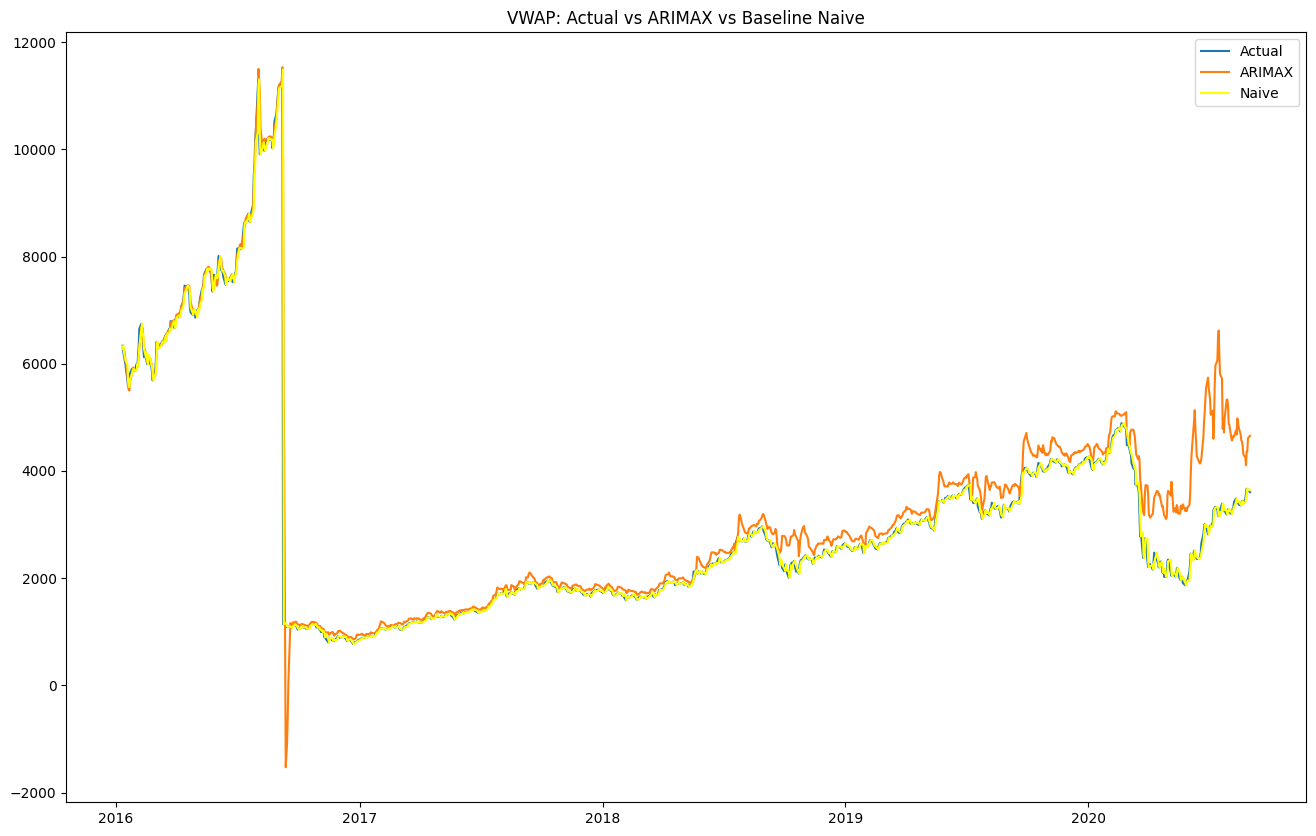

In [24]:
plt.figure(figsize=(16,10))
plt.plot(test_data.index, test_data['VWAP'], label='Actual')
plt.plot(test_data.index, test_data['Forecast'], label='ARIMAX')
plt.plot(test_data.index, test_data['Naive'], label='Naive', color='Yellow')
plt.legend()
plt.title("VWAP: Actual vs ARIMAX vs Baseline Naive")
plt.show()

## Conclusion

As from the plot, it is obvious that Naive performs better. Naive tracks price tightly but ARIMAX lags and overshoots. 

There's also a huge difference their accuracy; naive being significantly better.

Reason? Stock prices (and VWAP) behave like a random walk, meaning:

$$
P_t = P_{t-1} + e_t
$$

So, the naive model is already hard to beat.

Also, right now, there's strong non-stationarity and exogenous features may be leaking noise.